绘制第一个图表，了解pyecharts绘图步骤

In [1]:
from pyecharts.charts import Bar

bar=Bar()                                                        #初绐化具体类型图表
bar.add_xaxis(["衬衫", "羊毛衫", "雪纺衫", "裤子", "高跟鞋", "袜子"])     #添加数据及配置项
bar.add_yaxis("商家A", [5, 20, 36, 10, 75, 90])

#render 会生成本地 HTML 文件，默认会在当前目录生成 render.html 文件
# bar.render()

#也可以传入路径参数
# bar.render("mycharts.html")

#jupyter notebook直接调用render_notebook()随时随地渲染图表
bar.render_notebook()

In [2]:
# 上例非链式
from pyecharts.charts import Bar

bar=(Bar()
  .add_xaxis(["衬衫", "羊毛衫", "雪纺衫", "裤子", "高跟鞋", "袜子"])
  .add_yaxis("商家A", [5, 20, 36, 10, 75, 90])
    )
bar.render_notebook()

### 一 绘制基本图表

1.日历图：Calendar<p>
日历图由小色块有序且紧凑的组成的图表，以日历格式展示，从而在基础热力图的基础上增加了时间的维度，用来展示一段时间内的数据分布情况。<p>
from pyecharts.charts import Calendar<p>
Calendar(<p>
    # 初始化配置项<p>
    init_opts: opts.InitOpts = opts.InitOpts()<p>
)<p>
___
添加数据项：<p>
add(<p>
    series_name: str, # 系列名称，用于 tooltip 的显示，legend 的图例筛选。<p>
    yaxis_data: Sequence, # 系列数据，格式为 [(date1, value1), (date2, value2), ...]<p>
    is_selected: bool = True, # 是否选中图例<p>
    label_opts: Union[opts.LabelOpts, dict] = opts.LabelOpts(), # 标签配置项<p>
    calendar_opts: Union[opts.CalendarOpts, dict, None] = None, # 日历坐标系组件配置项，参考 `CalendarOpts`<p>
    tooltip_opts: Union[opts.TooltipOpts, dict, None] = None, # 提示框组件配置项<p>
    itemstyle_opts: Union[opts.ItemStyleOpts, dict, None] = None, # 图元样式配置项<p> 
)<p>
___
组件配置项<p>
CalendarOpts(<p>
pos_left: Optional[str] = None, # calendar组件离容器左侧的距离。<p>
pos_top: Optional[str] = None, # calendar组件离容器上侧的距离。<p>
pos_right: Optional[str] = None, # calendar组件离容器右侧的距离。<p>
pos_bottom: Optional[str] = None, # calendar组件离容器下侧的距离。<p>
orient: Optional[str] = None, # 日历坐标的布局朝向。可选 'horizontal', 'vertical'<p>
range_: Union[str, Sequence, int] = None,# 必填，日历坐标的范围 支持多种格式，使用示例：<p>
# 某一年 range: 2017    # 某个月 range: '2017-02'   # 某个区间 range: ['2017-01', '2017-02']<p>
daylabel_opts: Union[LabelOpts, dict, None] = None, # 星期轴的样式，参考 `series_options.LabelOpts`<p>
monthlabel_opts: Union[LabelOpts, dict, None] = None, # 月份轴的样式，参考 `series_options.LabelOpts`<p>
yearlabel_opts: Union[LabelOpts, dict, None] = None, # 年份的样式，参考 `series_options.LabelOpts`<p>
)

In [3]:
import datetime
import random
from pyecharts import options as opts
from pyecharts.charts import Calendar

beging = datetime.date(2022,1,1)
end = datetime.date(2022,12,31)
data = [
    [str(beging+datetime.timedelta(days=i)),random.randint(1000,25000)] for i in range((end-beging).days+1)
]
#data   查看data格式
c = Calendar(init_opts=opts.InitOpts(width='1200px',height='250px'))
c.add('',data,calendar_opts=opts.CalendarOpts(range_=2022))         #calendar_opts设置所用日历组件配置
#全局配置设置
c.set_global_opts(title_opts=opts.TitleOpts(title='日历图'),
                 visualmap_opts=opts.VisualMapOpts(
                     max_=25000,
                     min_=500,
                     orient='horizontal',
                     is_piecewise=True,
                     pos_top='230px',
                     pos_left='100px'))
c.render_notebook()

In [4]:
str(datetime.date(2022,1,1)+datetime.timedelta(1))

'2022-01-02'

In [5]:
c.set_global_opts?

2.漏斗图：Funnel<p>
漏斗图适用于业务流程比较规范、周期长、环节多的单流程单向分析，通过漏斗各环节业务数据的比较能够直观地发现和说明问题所在的环节，进而做出决策。<p>
漏斗图用梯形面积表示某个环节业务量与上一个环节之间的差异。漏斗图从上到下，有逻辑上的顺序关系，表现了随着业务流程的推进业务目标完成的情况。<p>
不适合的场景<p>
漏斗图不适合表示无逻辑顺序的分类对比，如果要表示无逻辑顺序的分类对比情况，请使用柱状图。<p>
漏斗图也不适合表示占比情况，如果要表示占比情况，请使用饼图。<p>
___
add(<p>
    series_name: str, # 系列名称，用于 tooltip 的显示，legend 的图例筛选。<p>
    data_pair: Sequence,# 系列数据，格式为 [(date1, value1), (date2, value2), ...]<p>
    is_selected: bool = True, # 是否选中图例<p>
    color: Optional[str] = None, # 系列 label 颜色<p>
    sort_: str = "descending", # 数据排序， 可以取 'ascending'，'descending'，'none'（表示按 data 顺序）<p>
    gap: Numeric = 0, # 数据图形间距<p>
    label_opts: Union[opts.LabelOpts, dict] = opts.LabelOpts(), # 标签配置项`<p>
    tooltip_opts: Union[opts.TooltipOpts, dict, None] = None, # 提示框组件配置项<p>
    itemstyle_opts: Union[opts.ItemStyleOpts, dict, None] = None, # 图元样式配置项 <p>
)

In [6]:
from pyecharts.charts import Funnel

data = [('浏览商品',50000),('放入购物车',35000),('生成订单',25000),('支付订单',15000),('完成交易',8000)]  #b

c = Funnel()
c.add('商品',data,gap=2)   #系列为“商品”，间距为2
c.set_global_opts(title_opts=opts.TitleOpts(title='Funnel'))
c.render_notebook()

3.仪表盘:Gauge<p>
仪表盘(Gauge)是一种拟物化的图表，刻度表示度量，指针表示维度，指针角度表示数值。仪表盘图表就像汽车的速度表一样，有一个圆形的表盘及相应的刻度，有一个指针指向当前数值。<p>
目前很多的管理报表或报告上都是用这种图表，以直观的表现出某个指标的进度或实际情况。<p>
仪表盘的好处在于它能跟人们的常识结合，使大家马上能理解看什么、怎么看。拟物化的方式使图标变得更友好更人性化，正确使用可以提升用户体验。<p>
___
add(<p>
    series_name: str, # 系列名称，用于 tooltip 的显示，legend 的图例筛选。<p>
    data_pair: Sequence,# 系列数据，格式为 [(date1, value1), (date2, value2), ...]<p>
    is_selected: bool = True, # 是否选中图例<p>
    min_: Numeric = 0, # 最小的数据值<p>
    max_: Numeric = 100, # 最大的数据值<p>
    split_number: Numeric = 10, # 仪表盘平均分割段数<p>
    start_angle: Numeric = 225, # 仪表盘起始角度。圆心 正右手侧为0度，正上方为 90 度，正左手侧为 180 度。<p>
    end_angle: Numeric = -45, # 仪表盘结束角度。<p>
    label_opts: Union[opts.LabelOpts, dict] = opts.LabelOpts(), # 标签配置项`<p>
    tooltip_opts: Union[opts.TooltipOpts, dict, None] = None, # 提示框组件配置项<p>
    itemstyle_opts: Union[opts.ItemStyleOpts, dict, None] = None, # 图元样式配置项 <p>
)

In [7]:
from pyecharts.charts import Gauge
c = Gauge()
c.add('',[('完成率',66.6)])
c.render_notebook()

In [8]:
#例8-11使用不同颜色
from pyecharts import options as opts
from pyecharts.charts import Gauge, Page
c = Gauge()
c.add("业务指标",[("完成率", 66.6)],axisline_opts=opts.AxisLineOpts(
    linestyle_opts=opts.LineStyleOpts(color=[(0.3, "#67e0e3"),
     (0.7, "#37a2da"), (1, "#fd666d")], width=30)))
c.set_global_opts(title_opts=opts.TitleOpts(title="Gauge-不同颜色"),
     legend_opts=opts.LegendOpts(is_show=False)) 
c.render_notebook()

4.水球图：Liquid<p>
水球图也是一种拟物化的图表。直观的表现出某个指标的进度或实际情况。<p>
___
add(<p>
    series_name: str, # 系列名称，用于 tooltip 的显示，legend 的图例筛选。<p>
    data_pair: Sequence,# 系列数据，格式为 [value1, value2, ....]<p>
    shape: Optional[str] = "circle",  #水球外形，有' circle', 'rect', 'roundRect', 'triangle', 'diamond', 'pin', 'arrow' 可选。<p>
    color: Optional[Sequence[str]] = None, # 波浪颜色。<p>
    is_animation: bool = True, # 是否显示波浪动画。<p>
    is_outline_show: bool = True, # 是否显示边框。<p>
    label_opts: Union[opts.LabelOpts, dict] = opts.LabelOpts(), # 标签配置项`<p>
    tooltip_opts: Union[opts.TooltipOpts, dict, None] = None, # 提示框组件配置项<p>
)

In [9]:
from pyecharts.charts import Liquid
c = Liquid()
c.add('',[0.6,0.8])
#c.add('',[0.6,0.8],is_animation=False,shape='rect')  #关闭动画效果，重设形状
c.render_notebook()

5.关系图：Graph<p>
用于展示数据之间的关联关系。<p>
___
add(<p>
    series_name: str, # 系列名称，用于 tooltip 的显示，legend 的图例筛选。<p>
    nodes: Sequence[Union[opts.GraphNode, dict]], # 关系图节点数据项列表，参考 opts.GraphNode<p>
    links: Sequence[Union[opts.GraphLink, dict]], # 关系图节点间关系数据项列表，参考 opts.GraphLink`<p>
    categories: Union[Sequence[Union[opts.GraphCategory, dict]], None] = None, # 关系图节点分类的类目列表，参考 opts.GraphCategory<p>
    symbol: Optional[str] = None,# 关系图节点标记的图形，包括 'circle', 'rect', 'roundRect', 'triangle', 'diamond', 'pin', 'arrow', 'none'<p>
    edge_length: Numeric = 50,# 边的两个节点之间的距离，这个距离也会受 repulsion。支持设置成数组表达边长的范围，此时不同大小的值会线性映射到不同的长度。值越小则长度越长。<p>
    gravity: Numeric = 0.2, # 节点受到的向中心的引力因子。该值越大节点越往中心点靠拢。<p>
    repulsion: Numeric = 50,# 节点之间的斥力因子。支持设置成数组表达斥力的范围，此时不同大小的值会线性映射到不同的斥力。值越大则斥力越大
)

In [10]:
# 读取并整理数据
import json
with open('data/Graph.json', 'r', encoding='utf-8') as f:
    data = json.load(f)
nodes = data['nodes']
links = []
for i in nodes:
    for j in nodes:
        links.append({'source':i.get('name'),'target':j.get('name')})  #添加结点间的联系
print(nodes)
print()
print(links)

[{'name': '结点1', 'symbolSize': 10, 'value': 10}, {'name': '结点2', 'symbolSize': 20, 'value': 20}, {'name': '结点3', 'symbolSize': 30, 'value': 30}, {'name': '结点4', 'symbolSize': 40, 'value': 40}, {'name': '结点5', 'symbolSize': 50, 'value': 50}, {'name': '结点6', 'symbolSize': 40, 'value': 40}, {'name': '结点7', 'symbolSize': 30, 'value': 30}, {'name': '结点8', 'symbolSize': 20, 'value': 20}]

[{'source': '结点1', 'target': '结点1'}, {'source': '结点1', 'target': '结点2'}, {'source': '结点1', 'target': '结点3'}, {'source': '结点1', 'target': '结点4'}, {'source': '结点1', 'target': '结点5'}, {'source': '结点1', 'target': '结点6'}, {'source': '结点1', 'target': '结点7'}, {'source': '结点1', 'target': '结点8'}, {'source': '结点2', 'target': '结点1'}, {'source': '结点2', 'target': '结点2'}, {'source': '结点2', 'target': '结点3'}, {'source': '结点2', 'target': '结点4'}, {'source': '结点2', 'target': '结点5'}, {'source': '结点2', 'target': '结点6'}, {'source': '结点2', 'target': '结点7'}, {'source': '结点2', 'target': '结点8'}, {'source': '结点3', 'target': '结点1'}, {

In [11]:
from pyecharts.charts import Graph
c = Graph()
c.add('',nodes,links,repulsion=8000)
c.render_notebook()

6.饼图：Pie<p>
add(<p>
    series_name: str, # 系列名称，用于 tooltip 的显示，legend 的图例筛选。<p>
    data_pair: Sequence,# 系列数据，格式为 [(date1, value1), (date2, value2), ...]<p>
    color: Optional[str] = None, # 系列 label 颜色<p>
    radius: Optional[Sequence] = None, # 饼图的半径，数组的第一项是内半径，第二项是外半径。默认设置成百分比，相对于容器高宽中较小的一项的一半<p>
    center: Optional[Sequence] = None, # 饼图的中心（圆心）坐标，数组的第一项是横坐标，第二项是纵坐标。默认设置成百分比，设置成百分比时第一项是相对于容器宽度，第二项是相对于容器高度<p>
    rosetype: Optional[str] = None,是否展示成南丁格尔图，通过半径区分数据大小，有‘radius’和‘area’两种模式。radius：扇区圆心角展现数据的百分比，半径展现数据的大小。area：所有扇区圆心角相同，仅通过半径展现数据大小。<p>
    label_opts: Union[opts.LabelOpts, dict] = opts.LabelOpts(), # 标签配置项<p>
    tooltip_opts: Union[opts.TooltipOpts, dict, None] = None, # 提示框组件配置项<p>
    itemstyle_opts: Union[opts.ItemStyleOpts, dict, None] = None, # 图元样式配置项 <p>
)

In [12]:
from pyecharts.charts import Pie
drinks = ['可乐','雪碧','橙汗','绿茶','奶茶','百威','青岛']
values = [44,131,42,46,146,78,41]
c = Pie()
c.add('',[list(z) for z in zip(drinks,values)])
#设置标签
#c.set_series_opts(label_opts=opts.LabelOpts(formatter='{b}:{c}'))
c.render_notebook()

In [19]:
# 以南丁格尔玫瑰图进行展示，rosetype=True
from pyecharts.charts import Pie
drinks = ['可乐','雪碧','橙汗','绿茶','奶茶','百威','青岛']
values = [44,131,42,46,146,78,41]
c = Pie()
c.add('',[list(z) for z in zip(drinks,values)],rosetype='radius')
#设置标签
c.set_series_opts(label_opts=opts.LabelOpts(formatter='{b}:{c}'))
c.render_notebook()

7.雷达图：Radar<p>
雷达图可以将多维（4维以上）数据进行展示，这些坐标轴起始于同一个圆心点，通常结束于圆周边缘，将同一组的点使用线连接起来就形成了雷达图。但是点的相对位置和坐标轴之间的夹角是没有任何信息量的。雷达图多边形较多时会造成混乱。<p>
___
雷达图显示设置<p>
add_schema(<p>
    schema: Sequence[Union[opts.RadarIndicatorItem, dict]], # 雷达指示器配置项列表，参考 RadarIndicatorItem<p>
    shape: Optional[str] = None, # 雷达图绘制类型，可选 'polygon' 和 'circle’<p>
    textstyle_opts: Union[opts.TextStyleOpts, dict] = opts.TextStyleOpts(), # 文字样式配置项，参考 series_options.TextStyleOpts<p>
    splitline_opt: Union[opts.SplitLineOpts, dict] = opts.SplitLineOpts(is_show=True), # 分割线配置项，参考 series_options.SplitLineOpts<p>
    splitarea_opt: Union[opts.SplitAreaOpts, dict] = opts.SplitAreaOpts(), # 分隔区域配置项，参考 series_options.SplitAreaOpts<p>
    axisline_opt: Union[opts.AxisLineOpts, dict] = opts.AxisLineOpts(), # 坐标轴轴线配置项，参考 global_options.AxisLineOpts<p>
)<p>
___
数据设置<p>
add(<p>
    series_name: str, # 系列名称，用于 tooltip 的显示，legend 的图例筛选。<p>
    data: Sequence, # 系列数据项<p><p>
    symbol: Optional[str] = “None",  #' circle', 'rect', 'roundRect', 'triangle', 'diamond', 'pin', 'arrow' 可选。<p>
    color: Optional[Sequence[str]] = None, # 系列 label 颜色<p>
    areastyle_opts: opts.AreaStyleOpts = opts.AreaStyleOpts(), # 区域填充样式配置项，参考 series_options.AreaStyleOpts<p>
    linestyle_opts: opts.LineStyleOpts = opts.LineStyleOpts(), # 线样式配置项，参考 series_options.LineStyleOpts<p>
    label_opts: Union[opts.LabelOpts, dict] = opts.LabelOpts(), # 标签配置项<p>
    tooltip_opts: Union[opts.TooltipOpts, dict, None] = None, # 提示框组件配置项<p>
)

In [14]:
#读取数据
import numpy as np
data = np.load('data/radar.npy')
data

array([[ 0.483, -0.799,  2.483,  2.424,  0.308],
       [ 1.16 , -0.377, -0.087, -0.095, -0.158],
       [-0.314,  1.686, -0.574, -0.537, -0.171],
       [-0.701, -0.415, -0.161, -0.165, -0.255],
       [ 0.057, -0.006, -0.227, -0.23 ,  2.191]])

In [15]:
#绘制雷达图
from pyecharts import options as opts
from pyecharts.charts import Radar
c = Radar()
#雷达图显示设置坐标系
c.add_schema(schema=[opts.RadarIndicatorItem(name=m,max_=n,min_ = k) for m ,n ,k in zip(list('LRFMC'),
                                                                                        data.max(axis = 0),
                                                                                        data.min(axis = 0))])
cols = ['#FF6EB4', '#FA8072', '#EECFA1', '#CDB5CD', '#B03060']
for i , j in enumerate(cols):       #for循环中利用枚举型（enumerate），可以同时获取索引和值  
    #雷达图数据设置
    c.add('客户群'+str(i),[[float(y) for y in data[i]]],           #设置系列名称及数据项
         areastyle_opts=opts.AreaStyleOpts(opacity=0.3,color=j),   #区域填充样式配置
         label_opts=opts.LabelOpts(is_show=False))                #标签配置
c.render_notebook()

8.词云图：WordCloud<p>
add(<p>
series_name: str, # 系列名称，用于 tooltip 的显示，legend 的图例筛选。<p>
data_pair: Sequence, # 系列数据项，[(word1, count1), (word2, count2)]<p>
shape: str = "circle", # 词云图轮廓，有 'circle', 'cardioid', 'diamond', 'triangle-forward', 'triangle', 'pentagon', 'star' 可选<p>
word_gap: Numeric = 20, # 单词间隔<p>
word_size_range=None, # 单词字体大小范围<p>
rotate_step: Numeric = 45, # 旋转单词角度<p>
tooltip_opts: Union[opts.TooltipOpts, dict, None] = None, # 提示框组件配置项<p>
)

In [16]:
from pyecharts import options as opts
from pyecharts.charts import Page, WordCloud
# from pyecharts.globals import SymbolType
words = [
    ("牛肉面", 7800),("黄河", 6181),
    ("《读者》杂志", 4386), ("甜胚子", 3055),
    ("甘肃省博物馆", 2055),("莫高窟", 8067),("兰州大学", 4244),
    ("西北师范大学", 1868),("中山桥", 3484),
    ("月牙泉", 1112),("五泉山", 980),
    ("五彩丹霞", 865),("黄河母亲", 847),("崆峒山",678),
    ("羊皮筏子", 1582),("兴隆山",868),
    ("兰州交通大学", 1555),("白塔山", 2550),("五泉山", 2550)]
c = WordCloud()
c.add("", words, word_size_range=[20, 80],shape='star')
c.set_global_opts(title_opts=opts.TitleOpts(title="WordCloud-基本示例"))
c.render_notebook()

复习

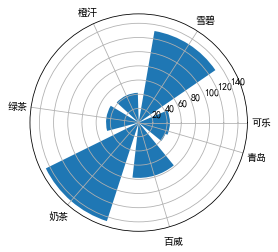

In [17]:
# matplotlib中在极坐标系下绘制柱形图即为玫瑰图
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

drinks = ['可乐','雪碧','橙汗','绿茶','奶茶','百威','青岛']
values = [44,131,42,46,146,78,41]

plt.subplot(111,polar=True) 
plt.bar(x=range(7),height=values)
plt.xticks(range(7),labels=drinks)
plt.show()

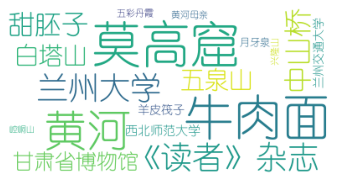

In [22]:
#用词频数据绘制词云
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
words = {
    "牛肉面": 7800,"黄河":6181,
    "《读者》杂志": 4386, "甜胚子": 3055,
    "甘肃省博物馆": 2055,"莫高窟": 8067,"兰州大学":4244,
    "西北师范大学": 1868,"中山桥": 3484,
    "月牙泉": 1112,"五泉山":98,
    "五彩丹霞": 865,"黄河母亲":847,"崆峒山":678,
    "羊皮筏子":1582,"兴隆山":868,
    "兰州交通大学":1555,"白塔山":2550,"五泉山":2550}
wordcloud = WordCloud(background_color="white",font_path='C:\Windows\Fonts\SIMYOU.TTF').generate_from_frequencies(words)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.756 seconds.
Prefix dict has been built successfully.


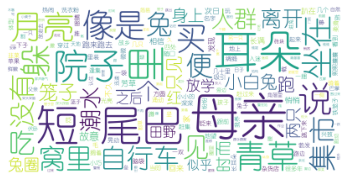

In [21]:
import jieba
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS

def get_wordList():
    f = open("data/mytext.txt")
    wordList = f.read()
    wordList = " ".join(jieba.cut(wordList))
    return wordList

def get_wordClound(mylist):
    #更新停用词，显示字体设置等
    wordcloud = WordCloud(background_color="white",stopwords=[line.strip() for line in open('data/d_stopwords.txt','r').readlines()],font_path='C:\Windows\Fonts\SIMYOU.TTF').generate(mylist)
    plt.imshow(wordcloud)
    plt.axis("off")
     
wordList = get_wordList()
get_wordClound(wordList)